In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
df = pd.read_csv('gabungan_cicahaeum_cibereum.csv',delimiter = ';')
df

,date,time,day,lat,lon,speed,titik_ke_titik,jalur,avg_speed_tiap_jalur,kondisi,jam_sibuk
0,2022-05-24,06:37:00,2,-6.902390,107.656430,0,Terminal Cicaheum-Halte Padasuka,1,7.3,1,1
1,2022-05-24,06:37:00,2,-6.902390,107.656430,1,Terminal Cicaheum-Halte Padasuka,1,7.3,1,1
2,2022-05-24,06:37:00,2,-6.902390,107.656428,1,Terminal Cicaheum-Halte Padasuka,1,7.3,1,1
3,2022-05-24,06:37:00,2,-6.902388,107.656418,1,Terminal Cicaheum-Halte Padasuka,1,7.3,1,1
4,2022-05-24,06:37:00,2,-6.902388,107.656408,2,Terminal Cicaheum-Halte Padasuka,1,7.3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
20151,2022-05-26,07:01:00,4,-6.913817,107.575513,11,Halte Jendral Sudirman 3-Terminal Damri Elang,17,19.0,3,1
20152,2022-05-26,07:01:00,4,-6.913792,107.575518,9,Halte Jendral Sudirman 3-Terminal Damri Elang,17,19.0,3,1
20153,2022-05-26,07:01:00,4,-6.913768,107.575512,6,Halte Jendral Sudirman 3-Terminal Damri Elang,17,19.0,3,1
20154,2022-05-26,07:01:00,4,-6.913753,107.575505,5,Halte Jendral Sudirman 3-Terminal Damri Elang,17,19.0,3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20156 entries, 0 to 20155
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  20156 non-null  object 
 1   time                  20156 non-null  object 
 2   day                   20156 non-null  int64  
 3   lat                   20156 non-null  float64
 4   lon                   20156 non-null  float64
 5   speed                 20156 non-null  int64  
 6   titik_ke_titik        20156 non-null  object 
 7   jalur                 20156 non-null  int64  
 8   avg_speed_tiap_jalur  20156 non-null  float64
 9   kondisi               20156 non-null  int64  
 10  jam_sibuk             20156 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.7+ MB


In [4]:
df['avg_speed_tiap_jalur'] = df['avg_speed_tiap_jalur'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20156 entries, 0 to 20155
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  20156 non-null  object 
 1   time                  20156 non-null  object 
 2   day                   20156 non-null  int64  
 3   lat                   20156 non-null  float64
 4   lon                   20156 non-null  float64
 5   speed                 20156 non-null  int64  
 6   titik_ke_titik        20156 non-null  object 
 7   jalur                 20156 non-null  int64  
 8   avg_speed_tiap_jalur  20156 non-null  int32  
 9   kondisi               20156 non-null  int64  
 10  jam_sibuk             20156 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


In [5]:
df.isna().sum()

date                    0
time                    0
day                     0
lat                     0
lon                     0
speed                   0
titik_ke_titik          0
jalur                   0
avg_speed_tiap_jalur    0
kondisi                 0
jam_sibuk               0
dtype: int64

In [6]:
x = df[['day','jam_sibuk', 'jalur']].values
x[0:5]

array([[2, 1, 1],
       [2, 1, 1],
       [2, 1, 1],
       [2, 1, 1],
       [2, 1, 1]], dtype=int64)

In [7]:
y = df['kondisi'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [9]:
x_train.shape, x_test.shape

((12093, 3), (8063, 3))

In [10]:
depth_test = []
latih_scores = []
test_scores = []
depth_latih = []
for i in range(1,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(x_train, y_train)
    latih = clf.score(x_train, y_train)
    test = clf.score(x_test, y_test)
    latih_scores.append(latih)
    test_scores.append(test)
    depth_test.append((i,test))
    depth_latih.append((i,latih))
print(depth_test)
print(depth_latih)

[(1, 0.7486047376906858), (2, 0.7486047376906858), (3, 0.7897804787300012), (4, 0.8248790772665261), (5, 0.8648145851420067), (6, 0.8830460126503783), (7, 0.9360039687461242), (8, 0.9492744635991567), (9, 0.965893587994543), (10, 0.965893587994543), (11, 0.965645541361776), (12, 0.965893587994543), (13, 0.965893587994543), (14, 0.965645541361776), (15, 0.965645541361776), (16, 0.965645541361776), (17, 0.965645541361776), (18, 0.965645541361776), (19, 0.965645541361776)]
[(1, 0.7568841478541305), (2, 0.7568841478541305), (3, 0.7894649797403457), (4, 0.8263458198958075), (5, 0.8685189779211114), (6, 0.8829901595964608), (7, 0.9361614156950302), (8, 0.9519556768378401), (9, 0.9665095509799058), (10, 0.9665095509799058), (11, 0.9665095509799058), (12, 0.9665095509799058), (13, 0.9665095509799058), (14, 0.9665095509799058), (15, 0.9665095509799058), (16, 0.9665095509799058), (17, 0.9665095509799058), (18, 0.9665095509799058), (19, 0.9665095509799058)]


In [11]:
datas = pd.DataFrame({'max_depth':range(1,20), 'latih_acc':latih_scores, 'test_acc':test_scores})
datas.head()

,max_depth,latih_acc,test_acc
0,1,0.756884,0.748605
1,2,0.756884,0.748605
2,3,0.789465,0.789780
3,4,0.826346,0.824879
4,5,0.868519,0.864815


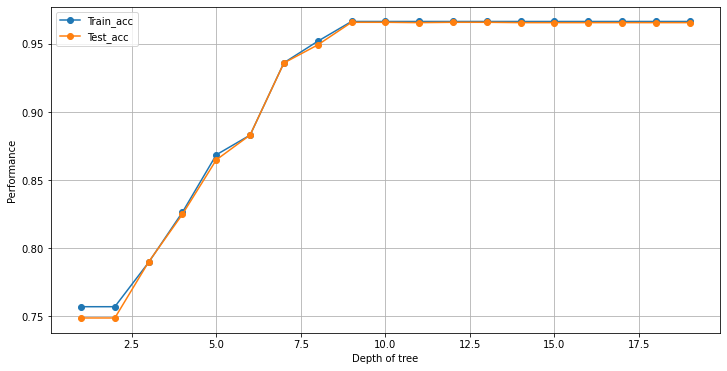

In [12]:
plt.figure(figsize=(12,6))
plt.plot(datas['max_depth'], datas['latih_acc'], marker='o', label='Train_acc')
plt.plot(datas['max_depth'], datas['test_acc'], marker='o', label='Test_acc')
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend()
plt.grid()
plt.show()

In [13]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=9, random_state=42)
model = model.fit(x_train, y_train)

In [14]:
y_pred = model.predict(x_train)#Accuracy
from sklearn import metrics 
print('Accuracy Score:', metrics.accuracy_score(y_train,y_pred))

Accuracy Score: 0.9665095509799058


In [15]:
y_pred = model.predict(x_test)#Accuracy
from sklearn import metrics 
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.965645541361776


In [16]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
print('Recall: ',format(recall_score(y_test, y_pred, average='weighted')))
print('Precision: ',format(precision_score(y_test, y_pred, average='weighted')))
print('F1-Score: ',format(f1_score(y_test, y_pred, average='weighted')))
print('Accuracy: ',format(accuracy_score(y_test, y_pred)))

Recall:  0.965645541361776
Precision:  0.9674334298446174
F1-Score:  0.9650626778401805
Accuracy:  0.965645541361776


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       934
           2       0.95      1.00      0.97      4788
           3       1.00      0.88      0.94      2341

    accuracy                           0.97      8063
   macro avg       0.98      0.96      0.97      8063
weighted avg       0.97      0.97      0.97      8063



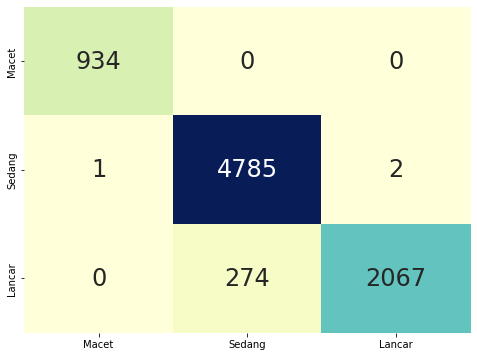

In [18]:
plt.figure(figsize = (8, 6))
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu", fmt="d", cbar=False, annot_kws={"size": 24})
ax.set_xticklabels(['Macet', 'Sedang', 'Lancar'])
ax.set_yticklabels(['Macet', 'Sedang', 'Lancar'], rotation=90, va='center')
plt.show()

In [30]:
x_new = [[6 ,2, 8]]
pred = model.predict(x_new)
pred

array([3], dtype=int64)

In [20]:
import pickle
with open ('dt_pickle', 'wb') as files:
    pickle.dump(model, files)

In [21]:
# load saved model
with open('dt_pickle' , 'rb') as f:
    lr = pickle.load(f)

In [22]:
lr.predict([[2 ,1, 17]])

array([3], dtype=int64)

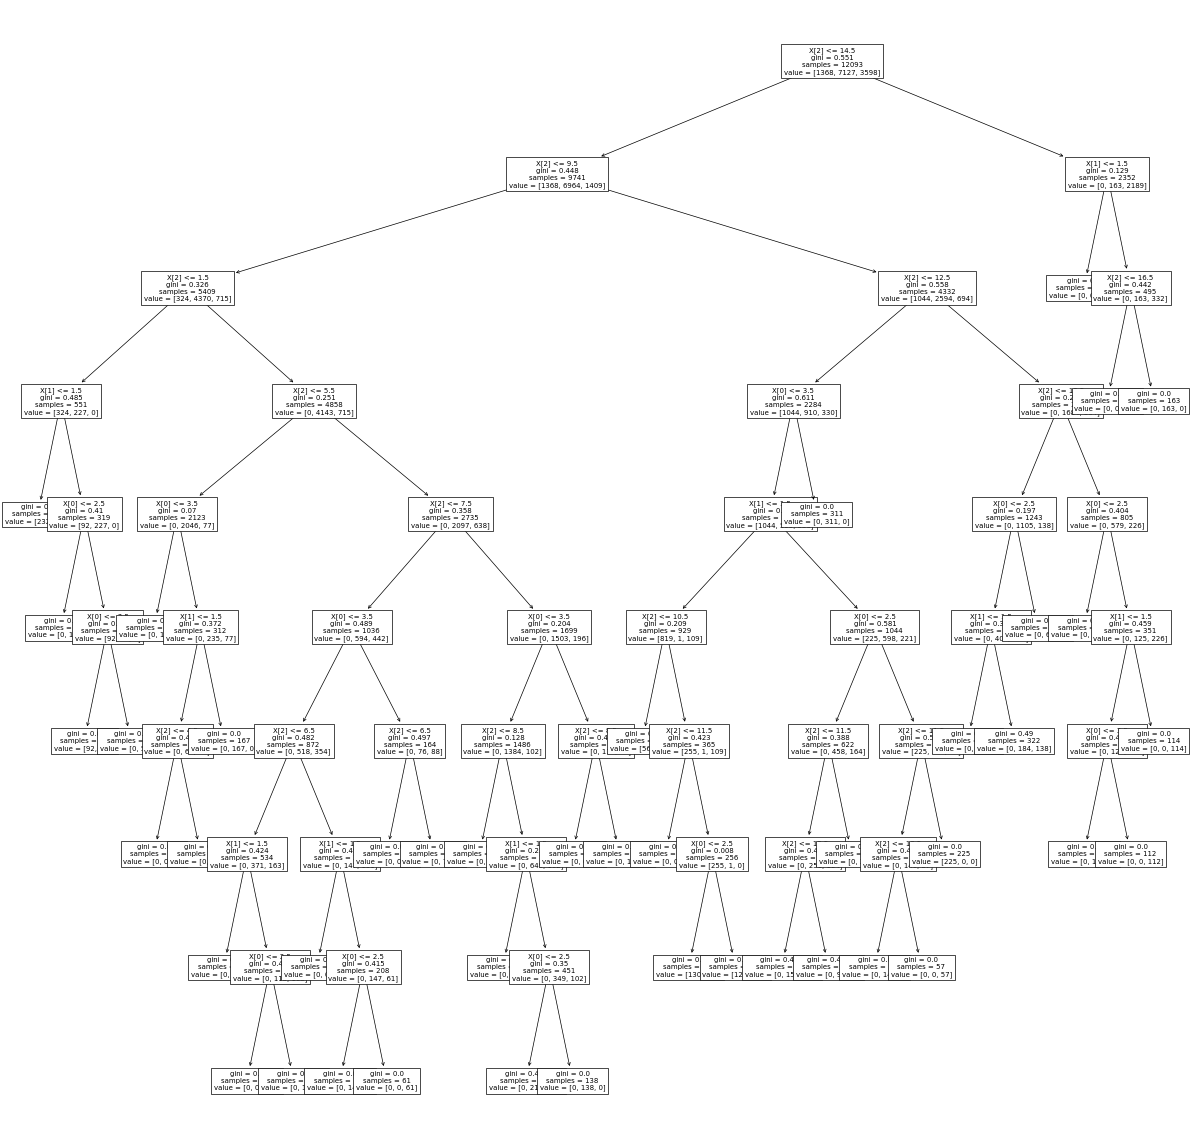

In [23]:
plt.rcParams['figure.dpi'] = 50
plt.subplots(figsize=(30,30))
tree.plot_tree(model, fontsize=10)
plt.show()